# Генерация датасетов, их визуализация

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=11)

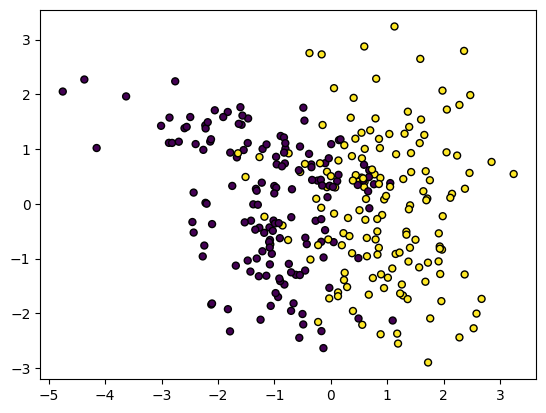

In [ ]:
# как видит классификатор
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

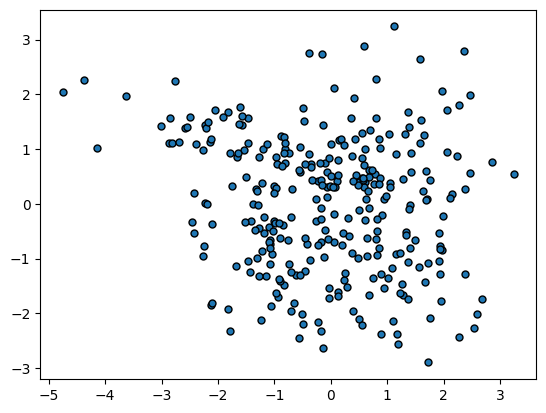

In [ ]:
# как видит кластеризатор
plt.scatter(data[:, 0], data[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

In [ ]:
data2, data2_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=125)

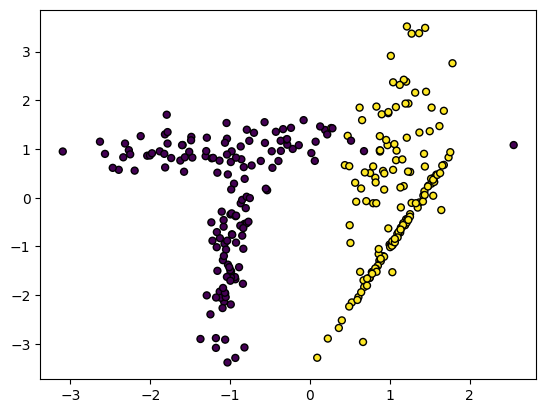

In [ ]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

In [ ]:
data3, data3_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=17)

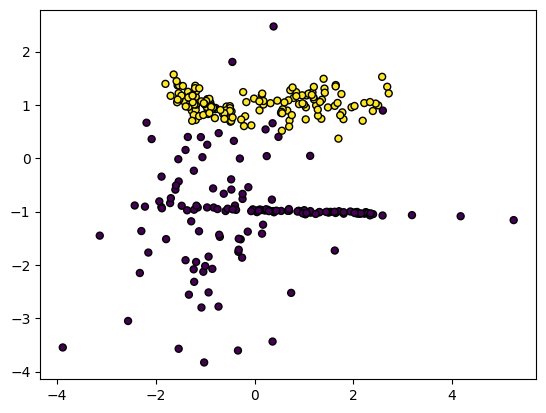

In [ ]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

KMeans

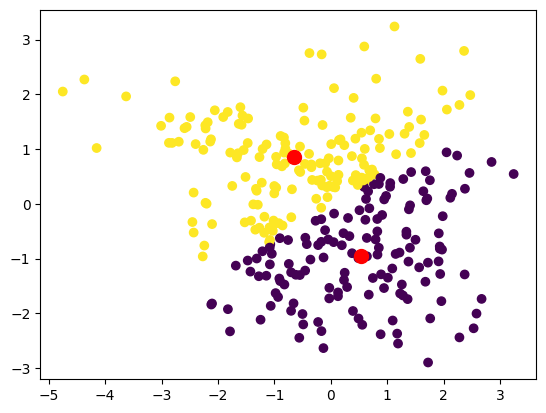

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, n_init='auto').fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [ ]:
from sklearn.metrics.cluster import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("homogeneity_score: ", homogeneity_score(kmeans.labels_, data_y))
print( "rand score: ", rand_score(kmeans.labels_, data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, kmeans.labels_))
print( "silhouette score: ", silhouette_score(data, kmeans.labels_))

homogeneity_score:  0.05761018577709792
rand score:  0.5376588628762542
davies_bouldin_score:  1.2358058626247166
silhouette score:  0.30679894842818745


Метод локтя

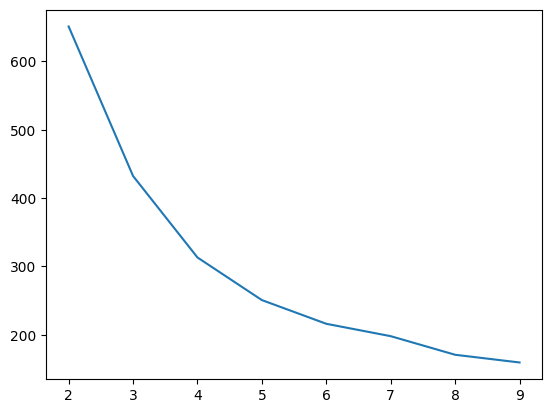

In [ ]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

Метод силуэта

0.5376588628762542

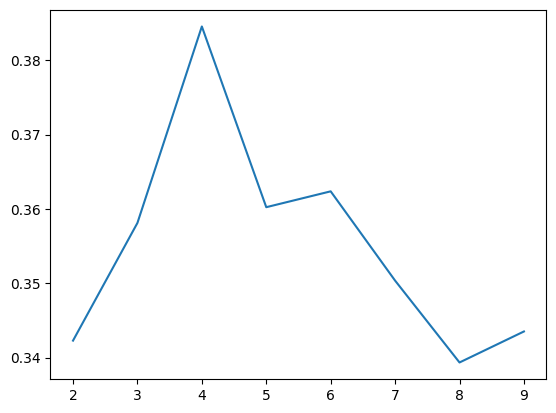

In [ ]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

plt.plot(range(2,10), ss)

rand_score(kmeans.labels_, data_y)

homogeneity_score:  0.15243087471030037
rand score:  0.5611148272017837
davies_bouldin_score:  0.867574117058098
silhouette score:  0.3434712091302798


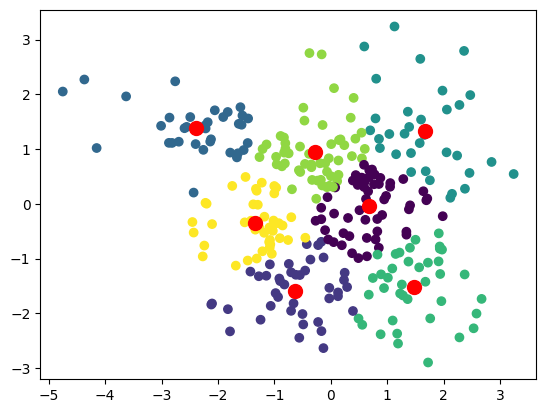

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(7, n_init='auto').fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

from sklearn.metrics.cluster import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("homogeneity_score: ", homogeneity_score(kmeans.labels_, data_y))
print( "rand score: ", rand_score(kmeans.labels_, data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, kmeans.labels_))
print( "silhouette score: ", silhouette_score(data, kmeans.labels_))

Affinity propagation

homogeneity_score:  0.1661859875893347
rand score:  0.5681828316610925
davies_bouldin_score:  0.9117607519491724
silhouette score:  0.3169273041804316


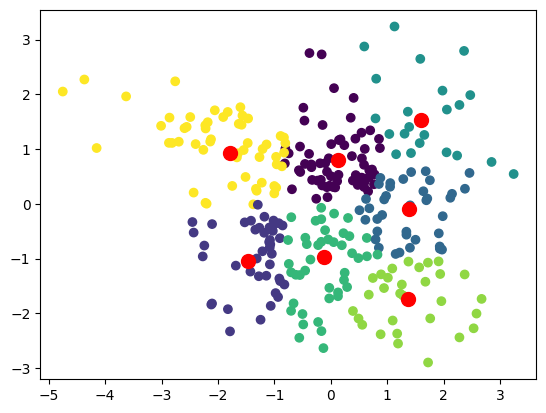

In [ ]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-42).fit(data)

print("homogeneity_score: ", homogeneity_score(clustering.labels_, data_y))
print( "rand score: ", rand_score(clustering.labels_, data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, clustering.labels_))
print( "silhouette score: ", silhouette_score(data, clustering.labels_))

plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

DB-SCAN

[-1  0  1]
homogeneity_score:  0.053507092177372845
rand score:  0.4995986622073579
davies_bouldin_score:  7.023327240299605
silhouette score:  0.10783761230470605


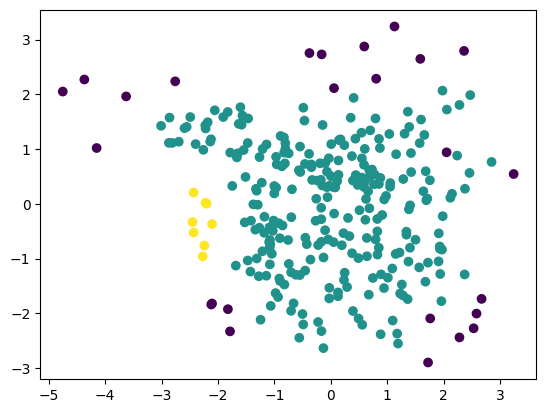

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN().fit(data)

print(np.unique(dbscan.labels_))

print("homogeneity_score: ", homogeneity_score(dbscan.labels_, data_y))
print( "rand score: ", rand_score(dbscan.labels_, data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))
print( "silhouette score: ", silhouette_score(data, dbscan.labels_))



plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

[-1  0  1]


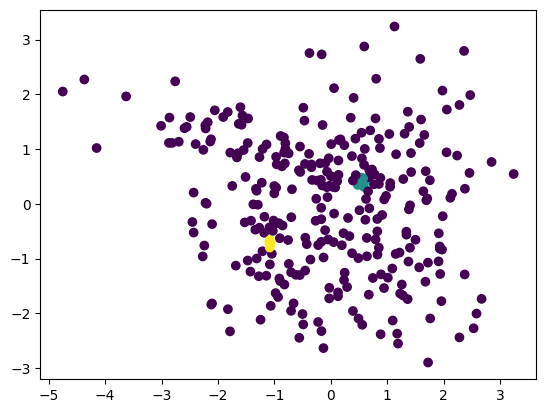

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data)
distances, indices = nbrs.kneighbors(data)
distances

array([[0.        , 0.16666639, 0.20141758, 0.27703696],
       [0.        , 0.10837185, 0.15777279, 0.27893426],
       [0.        , 0.05703263, 0.07170241, 0.27371228],
       ...,
       [0.        , 0.14877566, 0.24975702, 0.27940245],
       [0.        , 0.18239987, 0.35163656, 0.43149284],
       [0.        , 0.23796493, 0.26318669, 0.39840976]])

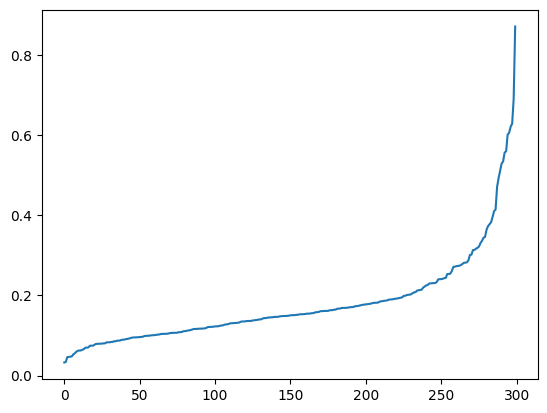

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5]


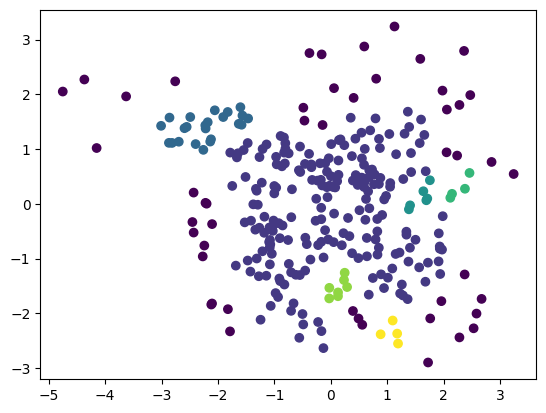

In [ ]:
dbscan = DBSCAN(eps=0.35, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

Gaussian Mixtures, EM

homogeneity_score:  0.125230060039953
rand score:  0.5700557413600892
davies_bouldin_score:  1.018051426395542
silhouette score:  0.2898655080174978


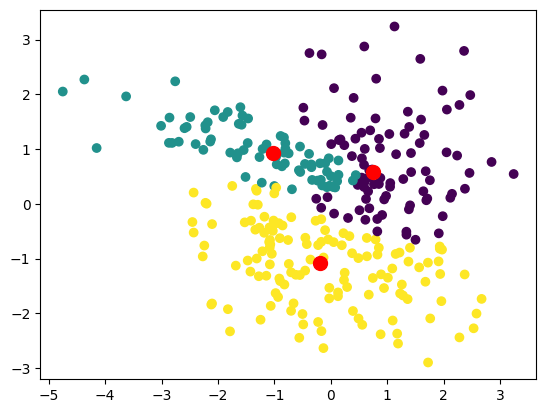

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3).fit(data)

gm.predict(data)

print("homogeneity_score: ", homogeneity_score(gm.predict(data), data_y))
print( "rand score: ", rand_score(gm.predict(data), data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, gm.predict(data)))
print( "silhouette score: ", silhouette_score(data, gm.predict(data)))


plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

Иерархическая кластеризация

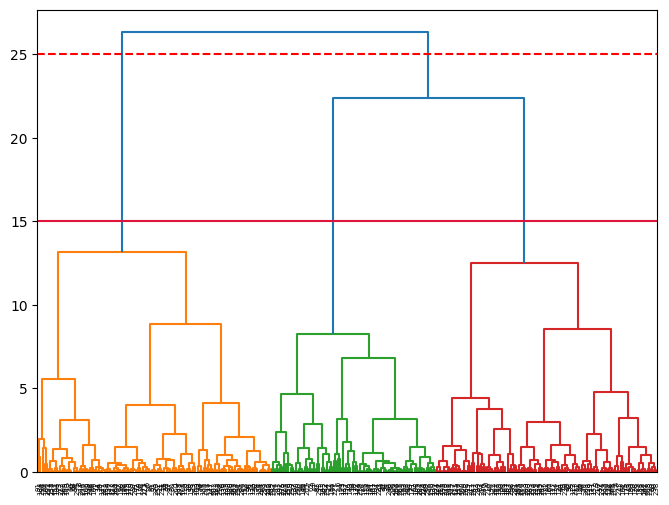

In [ ]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(25, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(15, color='crimson');

homogeneity_score:  0.1777233559812223
rand score:  0.6170122630992196
davies_bouldin_score:  0.909340602686731
silhouette score:  0.3412239949294342


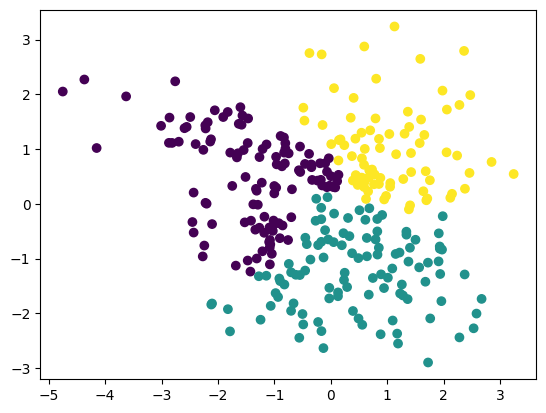

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)

print("homogeneity_score: ", homogeneity_score(clustering.labels_, data_y))
print( "rand score: ", rand_score(clustering.labels_, data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, clustering.labels_))
print( "silhouette score: ", silhouette_score(data, clustering.labels_))


plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Карты Кохонена

In [ ]:
# simpSOM
# https://pypi.org/project/sklearn-som/
!pip install sklearn_som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_som.som import SOM

In [ ]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data)

In [ ]:
predictions = iris_som.predict(data)

print("homogeneity_score: ", homogeneity_score(iris_som.predict(data), data_y))
print( "rand score: ", rand_score(iris_som.predict(data), data_y))

print( "davies_bouldin_score: ", davies_bouldin_score(data, iris_som.predict(data)))
print( "silhouette score: ", silhouette_score(data, iris_som.predict(data)))


homogeneity_score:  0.00013018975827760857
rand score:  0.4984169453734671
davies_bouldin_score:  1.3132622919809551
silhouette score:  0.3068824970859719


In [ ]:
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

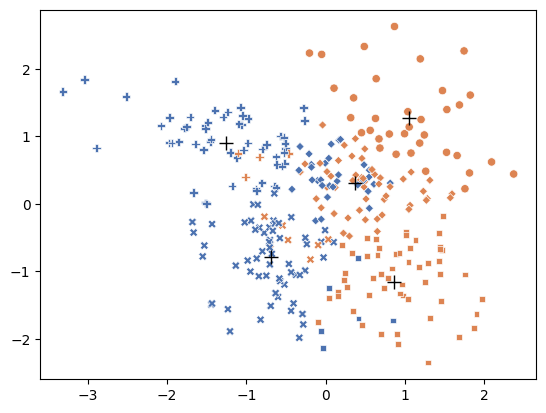

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]

        iteration = 0
        prev_centroids = None

        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1


    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs









centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train, true_labels = data, data_y

X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()